# Cotton Plant Disease Detection

**Cotton Plant Disease Detection using a Convolutional Neural Network (CNN)**

  This project seeks to build a machine-learning model using a Convolutional Neural Network (CNN) and image processing to diagnose cotton plants with specific diseases, paired with a comparative analysis of different image processing algorithms. We aim to build a functional model and port this model to a working android mobile app for the benefit of farmers and researchers.


** **


## 1. Importing libraries & preprocessing

In [20]:
# Computational libraries
import numpy as np          #linear algebra
import pandas as pd         # data processing
import os
#import utilities           I don't think this will be usefull 

# Keras Optimizers
#import wandb
#from wandb.keras import WandbMetricsLogger

# Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

#Import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import *

# Convolutional Neural Network

# Import Sequential
from keras.models import Sequential

# Importing the tensorflow  libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import *
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPool2D
)
from tensorflow.keras.preprocessing import image

# F1 Score
from sklearn.metrics import f1_score

# determine library versions
print("Output")
print(np.__version__)
print(tf.__version__)

Output
1.21.3
2.11.0


In [21]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
#/kaggle/input/cotton-disease-dataset/Cotton Disease/train      Original Path

train_datagen = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.2, zoom_range = 0.2,
                                  horizontal_flip = True,vertical_flip = True,
                                  rotation_range=20,width_shift_range=0.2,
                                height_shift_range=0.2)

train_df = train_datagen.flow_from_directory(r'C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\train',
                                            target_size = (128,128), batch_size = 32, class_mode= 'categorical',
                                            seed=42,shuffle=True)

Found 1951 images belonging to 4 classes.


In [22]:
# Preprocessing the validation set
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

valid_df = valid_datagen.flow_from_directory(r'C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\val',
                                            target_size = (128, 128), batch_size = 32,
                                            class_mode = 'categorical',seed=42,shuffle=True)

Found 253 images belonging to 4 classes.


In [23]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_df = test_datagen.flow_from_directory(r'C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\test',
                                            target_size = (128,128), batch_size = 32,
                                            class_mode = 'categorical',seed=42,shuffle=False)

Found 106 images belonging to 4 classes.


## 2. Building Convolutional Neural Network (CNN)

In [24]:
# Part 2 -  Building the CNN

# Initialising the CNN
model = Sequential()          # replace 'cnn' variable name with 'model'

# Step 1 - Convolution
model.add(Conv2D(filters = 32, padding = 'same', kernel_size=3, activation ='relu',
                              input_shape=[128, 128, 3]))

# Step 2 - Pooling
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(rate=0.25))

# Adding a second convolutional layer
model.add(Conv2D(filters = 32, padding='same', kernel_size=3, activation ='relu')) 
model.add(Conv2D(filters = 64, padding='same', kernel_size=3, activation ='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(rate=0.25))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full Connection
model.add(Dense(units=128, activation ='relu'))
model.add(Dense(units=128, activation ='relu'))

model.add(Dropout(rate=0.25))                                                           # 25% dropout rate

# Step 5 - Output layer
model.add(Dense(units=4, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

## 3. Training the CNN

In [26]:
# Part 3 - Training the CNN

# Compiling the CNN
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
# Training the CNN on the Training set & evaluating it on the validation set
# model.fit(x = train_df, validation_data = valid_df, epochs = 10)
history = model.fit(train_df, validation_data = valid_df, epochs = 25)

Epoch 1/25
61/61 [==============================] - 48s 754ms/step - loss: 1.3770 - accuracy: 0.3952 - val_loss: 1.2031 - val_accuracy: 0.3755
Epoch 2/25
61/61 [==============================] - 42s 683ms/step - loss: 1.1623 - accuracy: 0.4762 - val_loss: 1.1453 - val_accuracy: 0.4625
Epoch 3/25
61/61 [==============================] - 41s 665ms/step - loss: 1.0936 - accuracy: 0.5172 - val_loss: 1.1430 - val_accuracy: 0.3953
Epoch 4/25
61/61 [==============================] - 44s 727ms/step - loss: 1.0511 - accuracy: 0.5392 - val_loss: 0.9119 - val_accuracy: 0.5771
Epoch 5/25
61/61 [==============================] - 47s 775ms/step - loss: 0.9058 - accuracy: 0.6197 - val_loss: 0.7798 - val_accuracy: 0.6917
Epoch 6/25
61/61 [==============================] - 44s 725ms/step - loss: 0.7930 - accuracy: 0.6735 - val_loss: 0.7665 - val_accuracy: 0.6838
Epoch 7/25
61/61 [==============================] - 44s 721ms/step - loss: 0.7646 - accuracy: 0.6955 - val_loss: 0.7324 - val_accuracy: 0.6917

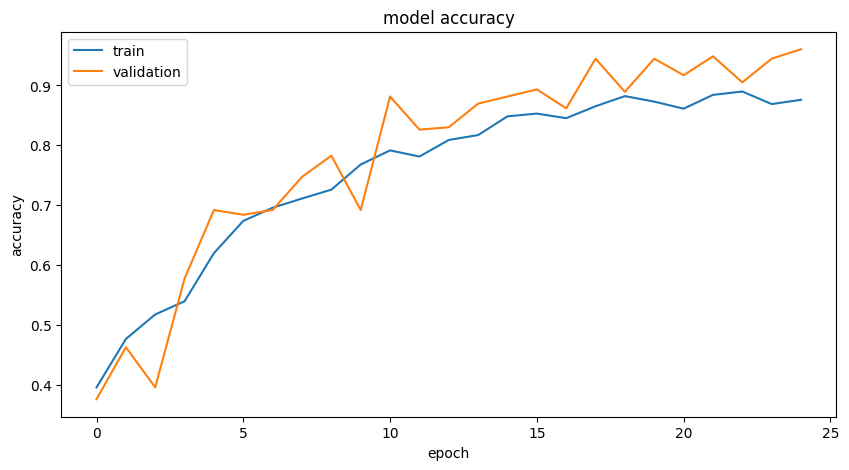

In [28]:
#sumarize history for model accuracy 
#x = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.xticks(x)
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
plt.savefig('model_accuracy.png', dpi= 200, bbox_inches='tight')


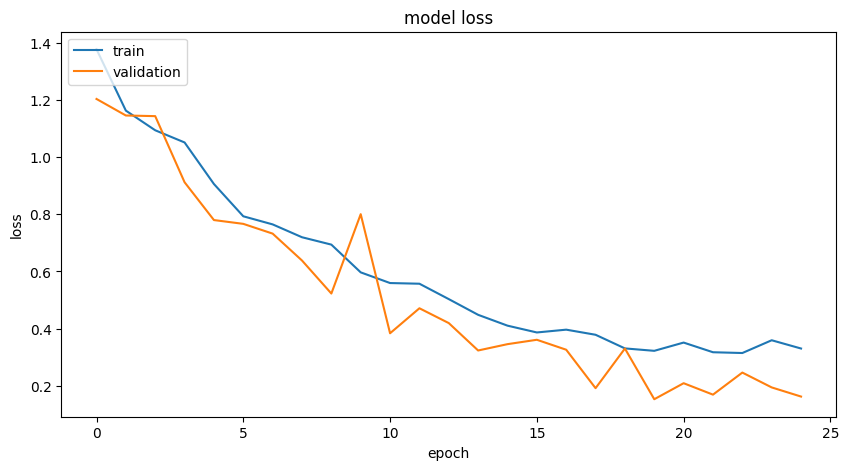

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
plt.savefig('model_loss.png', dpi= 200, bbox_inches='tight')

## 4. Making predictions

In [30]:
model.evaluate(valid_df)

8/8 [==============================] - 1s 177ms/step - loss: 0.1628 - accuracy: 0.9605


[0.1628076583147049, 0.9604743123054504]

In [31]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton plant/dsd (223).jpg', target_size = (128, 128))
# test_image


pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img(r"C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\test\fresh cotton plant\dsd (264)_iaip.jpg", target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
pred[result.argmax()]

1/1 [==============================] - 0s 160ms/step


'fresh cotton plant'

In [32]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (133)_iaip.jpg', target_size = (128, 128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img(r"C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\test\fresh cotton leaf\d (76)_iaip - Copy.jpg", target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
pred[result.argmax()]

1/1 [==============================] - 0s 41ms/step


'fresh cotton leaf'

In [33]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton plant/dd (885)_iaip.jpg', target_size = (128,128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img(r"C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\test\diseased cotton plant\dd (29)_iaip.jpg", target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
pred[result.argmax()]

1/1 [==============================] - 0s 42ms/step


'diseased cotton plant'

In [34]:
# test_image = image.load_img('/kaggle/input/cotton-disease-dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg', target_size = (128, 128))
# test_image

pred = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img(r"C:\Users\Natha\OneDrive\Desktop\Senior Project\Cotton Disease\test\diseased cotton leaf\dis_leaf (124).jpg", target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
pred[result.argmax()]

1/1 [==============================] - 0s 36ms/step


'diseased cotton leaf'

## 5. Save Prediction Results 

In [35]:
test_df.reset()                             # note this reset function. we may need to export to JSON before this function
pred=model.predict(test_df,verbose=1)

4/4 [==============================] - 2s 562ms/step


In [36]:
predicted_class_indices=np.argmax(pred,axis=1)

In [37]:
labels = (train_df.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [38]:
filenames=test_df.filenames
results=pd.DataFrame({"Filename":filenames,
                      "                             Predictions":predictions})
results.to_csv("results.csv",index=False)

## 6. Save HyperParameters
### Saving and loading model architecture using JSON file
